# Digit Detection: LeNet

Students: Juan Sebastián Barreto Jimenez y Juan Camilo Devia Bastos

Consultant: Ing. Eduardo Andrés Gerlien Reyes

Client: Ing. Olga Lucía Quintero Montoya

## Avoid warnings

In [1]:
# Avoid warnings in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Libraries

In [2]:
from tensorflow import keras
import keras.layers as layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import visualkeras
from keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import cv2

## Download and Process Data from MNIST Keras

In [3]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]

print(trainData.shape)

trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0
# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

(60000, 28, 28, 1)


## Export data to Excel

In [4]:
print(trainData[0].shape)

(28, 28, 1)


In [5]:
import pandas as pd

array =  testData.reshape((testData.shape[0], 28, 28))

df = pd.DataFrame(array[0])
df.to_excel(excel_writer = "output/test.xlsx",float_format='%.19f')

## Export data to Matlab

In [6]:
((trainData_m, trainLabels_m), (testData_m, testLabel_m)) = mnist.load_data()
trainData_m = trainData_m.reshape((28, 28, 1, trainData_m.shape[0]))
testData_m = testData_m.reshape((28, 28, 1, testData.shape[0]))
# scale data to the range of [0, 1]
trainData_m = trainData_m.astype("float32") / 255.0
testData_m = testData_m.astype("float32") / 255.0

from scipy.io import savemat
m_dic = {"trainData": trainData_m, "testData": testData_m, "trainLabels": trainLabels_m, "testLabels": testLabel_m}
savemat("../LeNet_Matlab/matlab_matrix.mat", m_dic)

## Mount CNN: LeNet

In [7]:
model = keras.Sequential()
numChannels, imgRows, imgCols = 1, 28, 28
numClasses = 10
inputShape = (imgRows, imgCols, numChannels)
activation = 'relu' 

# if we are using "channels first", update the input shape
if K.image_data_format() == "channels_first":
	print("ENtre")
	inputShape = (numChannels, imgRows, imgCols)

print(inputShape)
model.add(layers.Conv2D(filters=20, kernel_size=5, padding="same", activation=activation, input_shape=inputShape)) # 20,28,28
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # 20,14,14
model.add(layers.Conv2D(filters=50, kernel_size=5, padding="same", activation=activation)) # 50,14,14
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # 50,7,7
model.add(Flatten(data_format="channels_first"))
model.add(layers.Dense(units=500, activation=activation)) # 2450
model.add(layers.Dense(units=numClasses, activation = 'softmax'))

(28, 28, 1)


2022-08-28 19:03:45.015993: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Compile CNN: LeNet

In [8]:
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

## Train model

In [9]:
print("[INFO] training...")
model.fit(trainData, trainLabels, batch_size=128, epochs=20,verbose=1)

[INFO] training...
Epoch 1/20
469/469 [==============================] - 33s 69ms/step - loss: 1.0317 - accuracy: 0.7314
Epoch 2/20
469/469 [==============================] - 32s 67ms/step - loss: 0.2584 - accuracy: 0.9237
Epoch 3/20
469/469 [==============================] - 32s 68ms/step - loss: 0.1773 - accuracy: 0.9474
Epoch 4/20
469/469 [==============================] - 32s 68ms/step - loss: 0.1382 - accuracy: 0.9593
Epoch 5/20
469/469 [==============================] - 32s 68ms/step - loss: 0.1132 - accuracy: 0.9666
Epoch 6/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0975 - accuracy: 0.9708
Epoch 7/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0867 - accuracy: 0.9750
Epoch 8/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0777 - accuracy: 0.9768
Epoch 9/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0706 - accuracy: 0.9785
Epoch 10/20
469/469 [==============================] - 31s 67ms

## Evaluate model

In [8]:
print("[INFO] evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels,batch_size=128, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] evaluating...
79/79 [==============================] - 1s 13ms/step - loss: 0.0428 - accuracy: 0.9848
[INFO] accuracy: 98.48%


## Save Weights

In [11]:
print("[INFO] dumping weights to file...")
model.save_weights('output/lenet_weights.hdf5', overwrite=True)

[INFO] dumping weights to file...


In [12]:
json_config = model.to_json()
with open('output/model_config.json', 'w') as json_file:
    json_file.write(json_config)

## Randomly select a few testing digits

In [22]:
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
	# classify the digit
	print(np.newaxis)
	probs = model.predict(testData[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (testData[i][0] * 255).astype("uint8")
	# otherwise we are using "channels_last" ordering
	else:
		image = (testData[i] * 255).astype("uint8")
	# merge the channels into one image
	image = cv2.merge([image] * 3)
	# resize the image from a
	#  28 x 28 image to a 96 x 96 image so we
	# can better see it
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	# show the image and prediction
	cv2.putText(image, str(prediction[0]), (5, 20),
				cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
	print("[INFO] Predicted: {}, Actual: {}".format(prediction[0],
		np.argmax(testLabels[i])))
	cv2.imshow("Digit", image)
	cv2.waitKey(0)

None
[INFO] Predicted: 8, Actual: 8
None
[INFO] Predicted: 9, Actual: 9
None
[INFO] Predicted: 6, Actual: 6
None
[INFO] Predicted: 0, Actual: 0
None
[INFO] Predicted: 4, Actual: 4
None
[INFO] Predicted: 2, Actual: 2
None
[INFO] Predicted: 5, Actual: 9
None
[INFO] Predicted: 2, Actual: 2
None
[INFO] Predicted: 5, Actual: 5
None
[INFO] Predicted: 8, Actual: 8


In [140]:
import time
i = 0
# classify the digit
inicio = time.time()
probs = model.predict(testData[np.newaxis,i])
fin = time.time()
prediction = probs.argmax(axis=1)
print(fin-inicio)
# extract the image from the testData if using "channels_first"
# ordering
if K.image_data_format() == "channels_first":
	image = (testData[i][0] * 255).astype("uint8")
# otherwise we are using "channels_last" ordering
else:
	image = (testData[i] * 255).astype("uint8")
# merge the channels into one image
image = cv2.merge([image] * 3)
# resize the image from a
#  28 x 28 image to a 96 x 96 image so we
# can better see it
image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
# show the image and prediction
cv2.putText(image, str(prediction[0]), (5, 20),
			cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
print("[INFO] Predicted: {}, Actual: {}".format(prediction[0],
	np.argmax(testLabels[i])))
cv2.imshow("Digit", image)
# cv2.waitKey(0)

0.03131508827209473
[INFO] Predicted: 7, Actual: 7


In [14]:
print(model.layers[4])

In [15]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
print(first_layer_weights.shape)
#first_layer_weights=np.transpose(first_layer_weights,[0,1])
print(first_layer_weights.shape)
print(first_layer_weights)

(5, 5, 1, 20)
(5, 5, 1, 20)
[[[[-6.07295632e-02  3.59410085e-02  9.20789987e-02 -8.83584544e-02
     4.59908172e-02 -9.24295411e-02  1.15816509e-02  4.61040288e-02
     1.75614536e-01  2.21521065e-01 -1.45923803e-02  1.22747339e-01
    -5.99348843e-02 -1.01361915e-01 -5.61199412e-02 -3.47414277e-02
    -5.72313108e-02  6.55887872e-02  9.80650857e-02  2.45582275e-02]]

  [[ 8.91144797e-02  1.19422406e-01 -7.71619231e-02  1.60194829e-01
    -2.69567652e-04  1.97728518e-02 -1.64368764e-01 -2.34150868e-02
     1.08572543e-01  1.89260632e-01 -8.94133933e-03  8.58131200e-02
    -9.98563468e-02  1.66362412e-02 -2.65374053e-02  5.06775603e-02
     1.25150904e-01 -1.32774990e-02  1.73253000e-01  4.87498827e-02]]

  [[ 2.99916893e-01  1.90735966e-01  7.64173195e-02  1.37737736e-01
    -3.84260826e-02 -3.35050113e-02 -1.09289050e-01 -1.39029518e-01
     2.25818411e-01  2.32310578e-01 -5.81274703e-02  6.40911013e-02
     9.17150825e-02  1.73676610e-01 -1.01317428e-01  4.24994044e-02
    -6.3707187

In [24]:
from keras import models
from keras import layers
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activationsLayers = activation_model.predict(testData[np.newaxis,0])

# # Getting Activations of conv2D_1
conv2D_1 = activationsLayers[0]
# # shape of conv2D_1 layer activation
print("conv2D_1",conv2D_1.shape)
# 1th channel of the image after conv2D_1 layer of convolution is applied
im=conv2D_1[0, :, :, 0]
#print(im.shape)
df = pd.DataFrame(im)
for i in range(1,20):
    im=conv2D_1[0, :, :, i]
    dfAux = pd.DataFrame(im)
    df = pd.concat([df,dfAux])
df.to_csv("output/outputConv2D_1.dat",header=False,index=False,float_format='%.19f')

# # Getting Activations of maxPooling2D_1
maxPooling2D_1 = activationsLayers[1]
# # shape of maxPooling2D_1 layer activation
print("maxPooling2D_1",maxPooling2D_1.shape)
# 1th channel of the image after maxPooling2D_1 layer of convolution is applied
im=maxPooling2D_1[0, :, :, 0]
#print(im.shape)
df = pd.DataFrame(im)
for i in range(1,20):
    im=maxPooling2D_1[0, :, :, i]
    dfAux = pd.DataFrame(im)
    df = pd.concat([df,dfAux])
df.to_csv("output/outputMaxPooling2D_1.dat",header=False,index=False,float_format='%.19f')

# # Getting Activations of conv2D_2
conv2D_2 = activationsLayers[2]
# # shape of conv2D_2 layer activation
print("conv2D_2",conv2D_2.shape)
# 1th channel of the image after conv2D_2 layer of convolution is applied
im=conv2D_2[0, :, :, 0]
#print(im.shape)
df = pd.DataFrame(im)
for i in range(1,50):
    im=conv2D_2[0, :, :, i]
    dfAux = pd.DataFrame(im)
    df = pd.concat([df,dfAux])
df.to_csv("output/outputConv2D_2.dat",header=False,index=False,float_format='%.19f')

# # Getting Activations of maxPooling2D_2
# maxPooling2D_2 = activationsLayers[3]
# # # shape of maxPooling2D_2 layer activation
# print("maxPooling2D_2",maxPooling2D_2.shape)
# # 1th channel of the image after maxPooling2D_2 layer of convolution is applied
# im=maxPooling2D_2[0, :, :, 0]
# im_list=[]
# im_list.append(im)
# # df = pd.DataFrame(im)
# for i in range(1,50):
#     im=maxPooling2D_2[0, :, :, i]
#     im_list.append(im)
#     # dfAux = pd.DataFrame(im)
#     # df = pd.concat([df,dfAux])
# im_flatten = np.array(im_list)
# print("Tam: ",im_flatten.shape)
# #im_flatten=np.transpose(im_flatten,(2,0,1))
# print("Tam: ",im_flatten.shape)
# df = pd.DataFrame(im_flatten[0])
# for i in im_flatten[1:]:
#     dfAux = pd.DataFrame(i)
#     df = pd.concat([df,dfAux])
# df_maxPooling2D_2 = pd.DataFrame(im_flatten.reshape((1,2450)))
# df.to_csv("output/outputMaxPooling2D_2.dat",header=False,index=False,float_format='%.19f')

# # Getting Activations of maxPooling2D_2
maxPooling2D_2 = activationsLayers[3]
# shape of maxPooling2D_2 layer activation
print("maxPooling2D_2",maxPooling2D_2.shape)
# 1th channel of the image after maxPooling2D_1 layer of convolution is applied
im=maxPooling2D_2[0, :, :, 0]
#print(im.shape)
df = pd.DataFrame(im)
for i in range(1,50):
    im=maxPooling2D_2[0, :, :, i]
    dfAux = pd.DataFrame(im)
    df = pd.concat([df,dfAux])
df.to_csv("output/outputMaxPooling2D_2.dat",header=False,index=False,float_format='%.19f')

# # Getting Activations of flatten
flatten = activationsLayers[4]
# # shape of dense_1 layer activation
print("flatten",flatten.shape)
# 1th channel of the image after dense_1 layer of convolution is applied
im=flatten
df = pd.DataFrame(im)
df_flatten = df
df.to_csv("output/outputFlatten.dat",header=False,index=False,float_format='%.19f')


# # Getting Activations of dense_1
dense_1 = activationsLayers[5]
# # shape of dense_1 layer activation
print("dense_1",dense_1.shape)
# 1th channel of the image after dense_1 layer of convolution is applied
im=dense_1
df = pd.DataFrame(im)
df.to_csv("output/outputDense_1.dat",header=False,index=False,float_format='%.19f')

# # Getting Activations of dense_2
dense_2 = activationsLayers[6]
# # shape of dense_2 layer activation
print("dense_2",dense_2.shape)
# 1th channel of the image after dense_2 layer of convolution is applie
im=dense_2
df = pd.DataFrame(im)
df.to_csv("output/outputDense_2.dat",header=False,index=False,float_format='%.19f')

conv2D_1 (1, 28, 28, 20)
maxPooling2D_1 (1, 14, 14, 20)
conv2D_2 (1, 14, 14, 50)
maxPooling2D_2 (1, 7, 7, 50)
flatten (1, 2450)
dense_1 (1, 500)
dense_2 (1, 10)


## Visualize CNN: LeNet

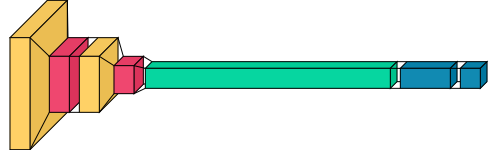

In [22]:
visualkeras.layered_view(model)

## Compare outputMaxPooling2D_2.dat

In [18]:
from keras import models
from keras import layers

def validateFlatten(df_maxPooling2D_2,df_flatten):
    for i,j in zip(df_maxPooling2D_2,df_flatten):
        if df_maxPooling2D_2[i][0] != df_flatten[j][0]:
            return 0
    return 1

# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

def test():
    for i in range(10000):
        activationsLayers = activation_model.predict(testData[np.newaxis,i])
        # # Getting Activations of maxPooling2D_2
        maxPooling2D_2 = activationsLayers[3]
        im=maxPooling2D_2[0, :, :, 0]
        im_list=[]
        im_list.append(im)
        for i in range(1,50):
            im=maxPooling2D_2[0, :, :, i]
            im_list.append(im)
        im_flatten = np.array(im_list)
        im_flatten=np.transpose(im_flatten,(2,0,1))
        df = pd.DataFrame(im_flatten[0])
        for i in im_flatten[1:]:
            dfAux = pd.DataFrame(i)
            df = pd.concat([df,dfAux])
        df_maxPooling2D_2 = pd.DataFrame(im_flatten.reshape((1,2450)))

        # # Getting Activations of flatten
        flatten = activationsLayers[4]
        im=flatten
        df_flatten = pd.DataFrame(im)
        if validateFlatten(df_maxPooling2D_2,df_flatten):
            pass
        else:
            return 0
    return 1

if test():
    print("Es correcto")
else:
    print("Es incorrecto")

KeyboardInterrupt: 